In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [2]:
files = {'customers'    : r'C:\Users\E1180014\Projetos\datasets\olist\olist_customers_dataset.csv',
         'geolocation'  : r'C:\Users\E1180014\Projetos\datasets\olist\olist_geolocation_dataset.csv',
         'items'        : r'C:\Users\E1180014\Projetos\datasets\olist\olist_order_items_dataset.csv',
         'payment'      : r'C:\Users\E1180014\Projetos\datasets\olist\olist_order_payments_dataset.csv',
         'orders'       : r'C:\Users\E1180014\Projetos\datasets\olist\olist_orders_dataset.csv',
         'products'     : r'C:\Users\E1180014\Projetos\datasets\olist\olist_products_dataset.csv',
         'sellers'      : r'C:\Users\E1180014\Projetos\datasets\olist\olist_sellers_dataset.csv',
         'review'       : r'C:\Users\E1180014\Projetos\datasets\olist\olist_order_reviews_dataset.csv',
         }

dfs = {}
for key, value in files.items():
    dfs[key] = pd.read_csv(value)

In [3]:
dfs['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
dfs['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
# Fazendo o merge entre os datasets customers e geolocation atraves do zip_code
customers_location = dfs['customers'].merge(dfs['geolocation'], how='inner', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix').drop_duplicates('customer_id', keep='first')

In [6]:
customers_location.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
147,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
294,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
441,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
588,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP


In [7]:
dfs['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
# Fazendo o merge de customers_location e orders
cusloc_order = customers_location.merge(dfs['orders'], how='inner', on='customer_id')

In [9]:
cusloc_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,2018-06-18 15:52:00,2018-06-21 12:18:32,2018-07-05 00:00:00
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:24,2017-09-11 13:43:41,2017-09-18 20:21:42,2017-10-02 00:00:00
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,2018-03-27 00:54:33,2018-03-28 19:27:01,2018-04-12 00:00:00
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,2018-07-29 20:55:21,2018-07-31 12:39:00,2018-08-03 16:48:40,2018-08-09 00:00:00


In [10]:
dfs['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
# Fazendo o merge de cus_loc e items
cuslocord_item = cusloc_order.merge(dfs['items'], how='inner', on='order_id')
cuslocord_item.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,...,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,...,2018-06-15 20:41:11,2018-06-18 15:52:00,2018-06-21 12:18:32,2018-07-05 00:00:00,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-06-19 20:30:41,79.90,14.87
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,...,2017-09-09 15:50:24,2017-09-11 13:43:41,2017-09-18 20:21:42,2017-10-02 00:00:00,1,83fe1ea6fd12c51fcd341a9968e65cc3,a3a38f4affed601eb87a97788c949667,2017-09-14 15:50:24,44.90,17.60
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,...,2018-03-26 12:15:37,2018-03-27 00:54:33,2018-03-28 19:27:01,2018-04-12 00:00:00,1,ccb3df28522945422e24b108603a1d04,39d54ff918774174706fb065d7f9dc07,2018-03-30 12:15:37,19.90,12.79
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,...,2018-07-29 20:55:21,2018-07-31 12:39:00,2018-08-03 16:48:40,2018-08-09 00:00:00,1,cb7d42475660f66a519c76f55715cd32,bd0a1b0aadca9a83d9304f7e8ff5fbd5,2018-08-02 20:55:21,63.90,13.11


In [12]:
dfs['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [13]:
# Fazendo o merge de cuslocord_item e products
cuslocordite_prod = cuslocord_item.merge(dfs['products'], how='inner', on='product_id')
cuslocordite_prod.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,47800,-12.147031,-44.996092,barreiras,BA,...,126.99,43.26,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,47800,-12.147031,-44.996092,barreiras,BA,...,126.99,43.26,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,barueri,SP,6414,-23.495901,-46.874687,barueri,SP,...,112.99,18.51,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,ac318397fb90e64c9a724a3fc61ef587,aaad33c5051196b5e73c7d65b9072e1d,37137,alfenas,MG,37137,-21.407289,-45.940358,alfenas,MG,...,116.99,57.08,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


In [14]:
dfs['review'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [15]:
# Fazendo o merge de cuslocordite_prod e review
cuslocordite_prod_rev = cuslocordite_prod.merge(dfs['review'], how='left', on='order_id')
cuslocordite_prod_rev.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP,...,8683.0,54.0,64.0,31.0,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,47800,-12.147031,-44.996092,barreiras,BA,...,8683.0,54.0,64.0,31.0,e7b977345ddac9a94389b44959e9d929,4,NaN,NaN,2018-02-15 00:00:00,2018-03-15 18:15:00
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,47800,-12.147031,-44.996092,barreiras,BA,...,8683.0,54.0,64.0,31.0,e7b977345ddac9a94389b44959e9d929,4,NaN,NaN,2018-02-15 00:00:00,2018-03-15 18:15:00
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,barueri,SP,6414,-23.495901,-46.874687,barueri,SP,...,8683.0,54.0,64.0,31.0,e934b832e3bd9951f2a163ea80cfe20d,4,NaN,NaN,2017-12-19 00:00:00,2017-12-21 21:48:38
4,ac318397fb90e64c9a724a3fc61ef587,aaad33c5051196b5e73c7d65b9072e1d,37137,alfenas,MG,37137,-21.407289,-45.940358,alfenas,MG,...,8683.0,54.0,64.0,31.0,b89b4460c0b589c0614d9b0126ae755a,3,NaN,Produto bom em conforme com o preço,2018-04-03 00:00:00,2018-04-03 23:42:32


In [16]:
cuslocordite_prod_rev.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [17]:
df_final = cuslocordite_prod_rev[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_photos_qty', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp']]

In [18]:
df_final.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,...,price,freight_value,product_category_name,product_photos_qty,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,124.99,21.88,moveis_escritorio,1.0,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,126.99,43.26,moveis_escritorio,1.0,e7b977345ddac9a94389b44959e9d929,4,NaN,NaN,2018-02-15 00:00:00,2018-03-15 18:15:00
2,97ee81fede5757f1ab031e83d1a59f56,452fab1c62b178922fc011b0eb89c1b9,47800,barreiras,BA,-12.147031,-44.996092,a4866dfc455353f48014a2b9a86608a2,delivered,2018-01-11 16:47:03,...,126.99,43.26,moveis_escritorio,1.0,e7b977345ddac9a94389b44959e9d929,4,NaN,NaN,2018-02-15 00:00:00,2018-03-15 18:15:00
3,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,6414,barueri,SP,-23.495901,-46.874687,03afb3c10af52ddfa3c33b9881bf43f8,delivered,2017-12-07 16:41:50,...,112.99,18.51,moveis_escritorio,1.0,e934b832e3bd9951f2a163ea80cfe20d,4,NaN,NaN,2017-12-19 00:00:00,2017-12-21 21:48:38
4,ac318397fb90e64c9a724a3fc61ef587,aaad33c5051196b5e73c7d65b9072e1d,37137,alfenas,MG,-21.407289,-45.940358,3c75044db750a89606612ed286713eb8,delivered,2018-03-13 20:11:20,...,116.99,57.08,moveis_escritorio,1.0,b89b4460c0b589c0614d9b0126ae755a,3,NaN,Produto bom em conforme com o preço,2018-04-03 00:00:00,2018-04-03 23:42:32


In [19]:
df_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name', 'product_photos_qty',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [20]:
datas = ['order_purchase_timestamp'
        ,'order_delivered_carrier_date'
        ,'order_delivered_customer_date'
        ,'order_estimated_delivery_date'
        ,'shipping_limit_date'
        ,'review_creation_date'
        ,'review_answer_timestamp']
datas

['order_purchase_timestamp',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'shipping_limit_date',
 'review_creation_date',
 'review_answer_timestamp']

In [21]:
for data in datas:
    df_final[data] = pd.to_datetime(df_final[data])

<ipython-input-21-c363daa6c200>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[data] = pd.to_datetime(df_final[data])


In [22]:
# Criando uma coluna de tempo de entregae hora da compra
df_final['delivery_time'] = (df_final['order_delivered_customer_date'].dt.date - df_final['order_purchase_timestamp'].dt.date).dt.days

<ipython-input-22-721f5f07f03f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['delivery_time'] = (df_final['order_delivered_customer_date'].dt.date - df_final['order_purchase_timestamp'].dt.date).dt.days


In [23]:
df_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name', 'product_photos_qty',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'delivery_time'],
      dtype='object')

In [24]:
# Selecionando apenas os dados de 2017 a 01/09/2018
df_final = df_final[(df_final['order_purchase_timestamp'].dt.year > 2016)
                   &
                   (df_final['order_purchase_timestamp'] < pd.to_datetime('20180901'))
                   ]

In [25]:
df_final = df_final.reset_index(drop=True)

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112639 entries, 0 to 112638
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112639 non-null  object        
 1   customer_unique_id             112639 non-null  object        
 2   customer_zip_code_prefix       112639 non-null  int64         
 3   customer_city                  112639 non-null  object        
 4   customer_state                 112639 non-null  object        
 5   geolocation_lat                112639 non-null  float64       
 6   geolocation_lng                112639 non-null  float64       
 7   order_id                       112639 non-null  object        
 8   order_status                   112639 non-null  object        
 9   order_purchase_timestamp       112639 non-null  datetime64[ns]
 10  order_approved_at              112624 non-null  object        
 11  

In [27]:
df_final['order_purchase_timestamp']

0        2017-05-16 15:05:35
1        2018-01-11 16:47:03
2        2018-01-11 16:47:03
3        2017-12-07 16:41:50
4        2018-03-13 20:11:20
                 ...        
112634   2018-05-03 11:13:38
112635   2017-07-09 15:17:43
112636   2018-04-29 17:40:51
112637   2017-10-17 21:50:00
112638   2017-08-01 12:57:02
Name: order_purchase_timestamp, Length: 112639, dtype: datetime64[ns]

In [28]:
# Analisar o volume de compras em cada mês para saber em qual período houve um maior volume de compras
df_meses_compras = pd.DataFrame()

In [29]:
df_meses_compras['mes'] = df_final['order_purchase_timestamp'].dt.month
df_meses_compras

,mes
0,5
1,1
2,1
3,12
4,3
...,...
112634,5
112635,7
112636,4
112637,10


In [30]:
df_meses_compras['ano'] = df_final['order_purchase_timestamp'].dt.year
df_meses_compras

,mes,ano
0,5,2017
1,1,2018
2,1,2018
3,12,2017
4,3,2018
...,...,...
112634,5,2018
112635,7,2017
112636,4,2018
112637,10,2017


In [31]:
df_meses_compras['count'] = df_final['customer_id']
df_meses_compras

,mes,ano,count
0,5,2017,06b8999e2fba1a1fbc88172c00ba8bc7
1,1,2018,97ee81fede5757f1ab031e83d1a59f56
2,1,2018,97ee81fede5757f1ab031e83d1a59f56
3,12,2017,44e25679aa4d5d2ef5103f6b0174a586
4,3,2018,ac318397fb90e64c9a724a3fc61ef587
...,...,...,...
112634,5,2018,cd24dfdff8d99033e3794d9b104c95d0
112635,7,2017,d1b1ef27bb2fbdeedc8823febfcc4072
112636,4,2018,ec5f9c9dd3ff056f05411979267887a5
112637,10,2017,7fb62e47282b83f023cf1fef8d8309c9


In [32]:
# Estou agrupando por ano e mes com base no id_customer que indica o numero de pedidos
df_meses_compras = df_meses_compras.groupby(['ano', 'mes'])['count'].count().reset_index()
df_meses_compras

,ano,mes,count
0,2017,1,966
1,2017,2,1961
2,2017,3,3013
3,2017,4,2687
4,2017,5,4170
5,2017,6,3601
6,2017,7,4556
7,2017,8,4945
8,2017,9,4854
9,2017,10,5355


In [33]:
# Criando uma nova coluna chamada ano_mes
df_meses_compras['ano_mes'] = df_meses_compras['ano'].astype(str) + ', ' + df_meses_compras['mes'].astype(str)

In [34]:
df_meses_compras.head()

,ano,mes,count,ano_mes
0,2017,1,966,"2017, 1"
1,2017,2,1961,"2017, 2"
2,2017,3,3013,"2017, 3"
3,2017,4,2687,"2017, 4"
4,2017,5,4170,"2017, 5"


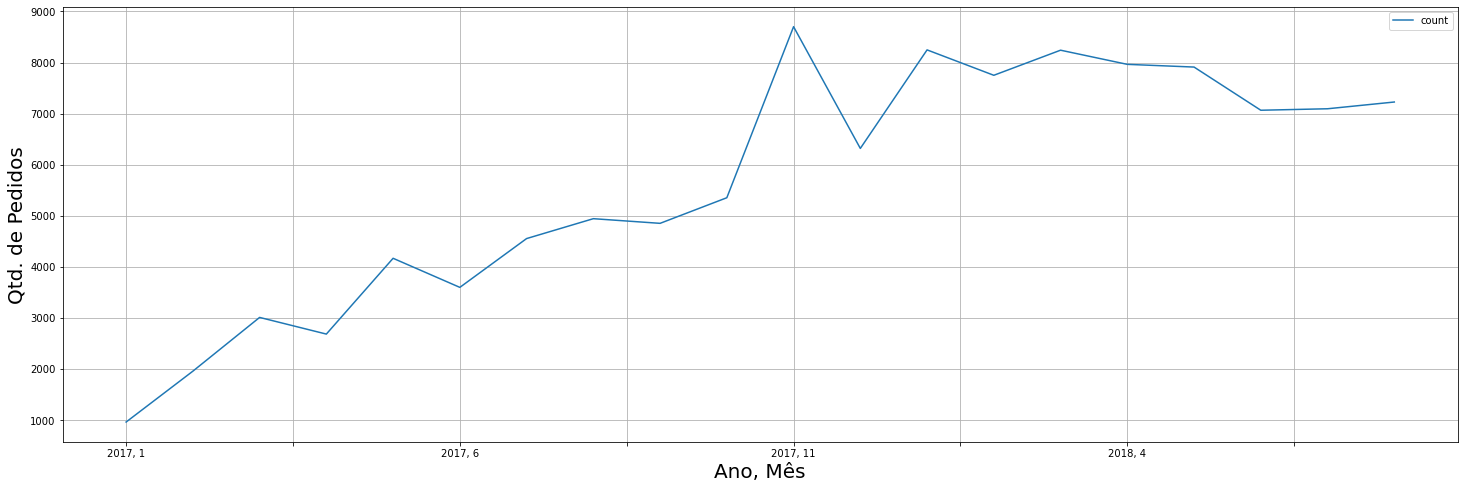

In [35]:
# Criando um gráfico que cruza a quantidade de compras por ano/mês
df_meses_compras.plot(x='ano_mes', y='count', figsize=(25,8))
plt.xlabel('Ano, Mês', size=20)
plt.ylabel('Qtd. de Pedidos', size=20)
plt.grid()
plt.show()

In [55]:
# Criando df para valor total de compras por estado, preço medio de compra por estado
# e um df para valor medio de frete por estado
df_compras_estado = df_final.groupby('customer_state', as_index=False)['price'].sum().sort_values(by='customer_state')
df_compras_med_estado = df_final.groupby('customer_state', as_index=False)['price'].mean().sort_values(by='customer_state')
df_frete_medio = df_final.groupby('customer_state', as_index=False)['freight_value'].mean().sort_values(by='customer_state')

In [56]:
df_compras_estado.head()

,customer_state,price
0,AC,15982.95
1,AL,80306.29
2,AM,22412.74
3,AP,13474.30
4,BA,511706.97


In [57]:
df_compras_med_estado.head()

,customer_state,price
0,AC,173.727717
1,AL,180.463573
2,AM,135.016506
3,AP,164.320732
4,BA,134.518131


In [58]:
df_frete_medio.head()

,customer_state,freight_value
0,AC,40.073370
1,AL,35.762427
2,AM,33.169458
3,AP,34.006098
4,BA,26.328956


In [59]:
df_compras_med_estado['price'].describe()

count     27.000000
mean     145.182488
std       21.172449
min      109.548984
25%      124.644414
50%      144.979641
75%      158.716531
max      189.981800
Name: price, dtype: float64

In [60]:
df_frete_medio.describe()

,freight_value
count,27.000000
mean,30.487167
std,8.409503
min,15.143058
25%,21.876933
50%,32.790216
75%,37.010877
max,43.725102


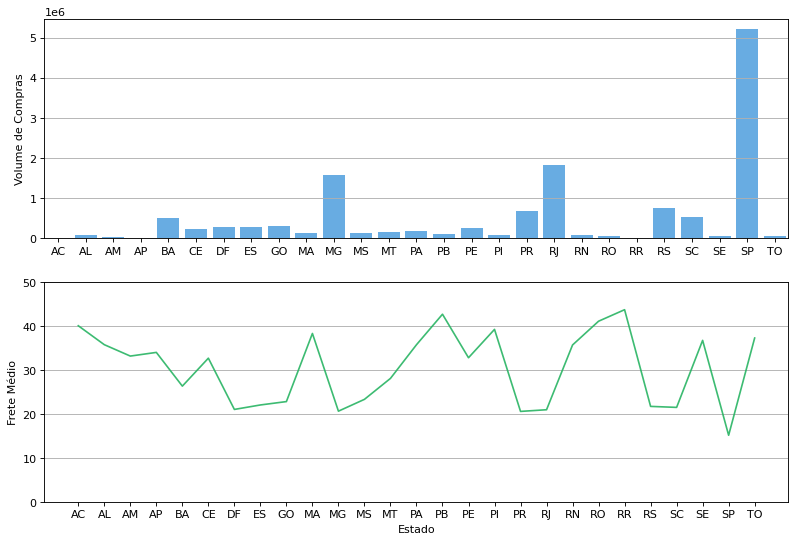

In [70]:
# Pelos gráficos percebe-se que os valores dos fretes são inversamente proporcionais aos valores de compras
plt.figure(num=None, figsize=(12,8), dpi=80)

plt.subplot(2,1,1)
sns.barplot(x=df_compras_estado['customer_state'], y=df_compras_estado['price'], color='#42A5F5', alpha=0.9)
plt.xlabel(None)
plt.ylabel('Volume de Compras')
plt.grid(axis='y')

plt.subplot(2, 1, 2)
sns.lineplot(x=df_frete_medio['customer_state'], y=df_frete_medio['freight_value'], color='#28B463', alpha=0.9)
plt.ylim(0, 50)
plt.xlabel('Estado')
plt.ylabel('Frete Médio')
plt.grid(axis='y')
plt.show()

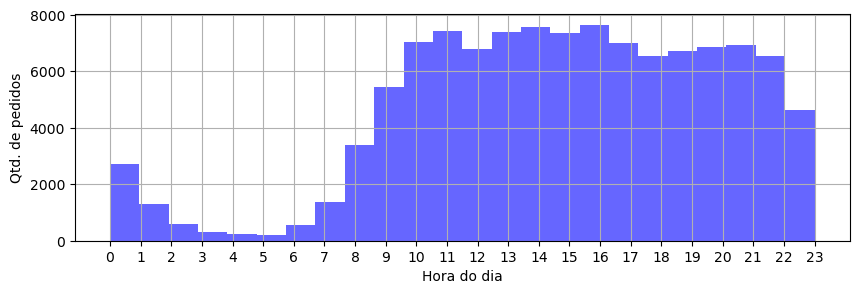

In [75]:
# Quantidade de compras por horario do dia
df_final['purchase_hour'] = df_final['order_purchase_timestamp'].dt.hour

plt.figure(num=None, figsize=(10,3), dpi=100)
plt.hist(df_final['purchase_hour'], bins=24, facecolor='b', alpha=0.6)
plt.xticks(ticks=np.arange(24))
plt.xlabel('Hora do dia')
plt.ylabel('Qtd. de pedidos')
plt.grid()
plt.show()
# Percebe-se que há um maior volume de compras entre 10 e 22 hrs
# Com picos as 11 hrs e 16 hrs

In [79]:
#Seleção de informações agrupadas pelo consumidor
cus_valor = df_final.groupby('customer_unique_id', as_index=False)['price'].sum() #price_x
cus_qtd = df_final.groupby('customer_unique_id', as_index=False)['price'].count() #price_y
cus_frete = df_final.groupby('customer_unique_id', as_index=False)['freight_value'].sum()
cus_loc = df_final[['customer_unique_id', 'geolocation_lat', 'geolocation_lng', 'customer_state']].drop_duplicates('customer_unique_id')
cus_review = df_final.groupby('customer_unique_id', as_index=False)['review_score'].mean()

#União das informações em um Dataframe
customer = cus_valor.merge(cus_qtd, on='customer_unique_id')
customer = customer.merge(cus_frete, on='customer_unique_id')
customer = customer.merge(cus_loc, on='customer_unique_id')
customer = customer.merge(cus_review, on='customer_unique_id')
customer = customer.rename(columns={'price_x':'price', 'price_y':'count_items'})

print('Média do valor de compra: R$ ' + str(round(customer['price'].mean(),2)) + '\nDesvio Padrão: R$ ' + str(round(customer['price'].std(),2)))
customer.sort_values(by='price', ascending=False).head(10)

Média do valor de compra: R$ 143.0
Desvio Padrão: R$ 218.97


,customer_unique_id,price,count_items,freight_value,geolocation_lat,geolocation_lng,customer_state,review_score
3772,0a0a92112bd4c708ca5fde585afaa872,13440.0,8,224.08,-22.901095,-43.182559,RJ,1.0
80906,da122df9eeddfedc1dc1f5349a1a690c,7388.0,2,183.63,-22.871875,-42.269220,RJ,5.0
43891,763c8b1c9c68a0229c42c9fc6f662b93,7160.0,4,114.88,-20.376161,-40.305294,ES,1.0
81746,dc4802a71eae9be1dd28f5d788ceb526,6735.0,1,194.31,-20.500241,-54.568666,MS,5.0
25865,459bef486812aa25204be022145caa62,6729.0,1,193.21,-20.274743,-40.284131,ES,1.0
94572,ff4159b92c40ebe40454e3e6a7c35ed6,6499.0,1,227.66,-22.205949,-49.954940,SP,5.0
23805,4007669dec559734d6f53e029e360987,5934.6,6,146.94,-20.158251,-44.882438,MG,1.0
88532,eebb5dda148d3893cdaf5b5ca3040ccb,4690.0,1,74.34,-23.680005,-46.417609,SP,4.0
34622,5d0a2980b292d049061542014e8960bf,4599.9,2,209.54,-16.693725,-49.277801,GO,1.0
27084,48e1ac109decbb87765a3eade6854098,4590.0,1,91.78,-7.101960,-34.842360,PB,5.0


In [81]:
# Analisando comentarios de 3 consumidores que deram nota 1
# Verificou-se que as notas baixas se deram muito por conta de falhas na entrega
a = df_final[['customer_unique_id','review_score', 'review_comment_message']][
    (df_final['customer_unique_id'] == '0a0a92112bd4c708ca5fde585afaa872')
    |(df_final['customer_unique_id'] == '763c8b1c9c68a0229c42c9fc6f662b93')
    |(df_final['customer_unique_id'] == '459bef486812aa25204be022145caa62')]
print('Comentários por parte dos consumidores que pontuarão a avaliação com nota 1.00')
print('')
print('CONSUMIDOR 1: ' + a.groupby('customer_unique_id')['review_comment_message'].min()[0])
print('CONSUMIDOR 2: ' + a.groupby('customer_unique_id')['review_comment_message'].min()[1])
print('CONSUMIDOR 3: ' + a.groupby('customer_unique_id')['review_comment_message'].min()[2])

Comentários por parte dos consumidores que pontuarão a avaliação com nota 1.00

CONSUMIDOR 1: Peço por favor verificar a entrega do pedido, pois não recebemos.
CONSUMIDOR 2: Demora no retorno sobre o endereço de entrega
CONSUMIDOR 3: Comprei 04 unidades, e foram entregues apenas 02 pacotes com 01 unidade cada. Ainda não sei se serão entregues as outras 02 unidades faltantes.
De qualquer forma, a entrega deve ser de uma única vez.
